In [2]:
# testing for NMA in BIOPYTHON
import os
import numpy as np

In [3]:
os.listdir()

['BIOpython_test.ipynb', '7ltn.pdb']

In [4]:
file = "7ltn.pdb"

In [31]:
import prody
from prody import *



structure = parsePDB(file)

#strip water 
# structure = structure.select('not resname HOH')
print(structure)



@> 2602 atoms and 1 coordinate set(s) were parsed in 0.01s.


AtomGroup 7ltn


In [58]:
from prody import *
# Calculate normal mode analysis
# Initialize ANM object
nma = prody.ANM()

# Build Hessian matrix
nma.buildHessian(structure)

# Calculate normal modes
nma.calcModes()

# Get cross correlation matrix

corr = calcCrossCorr(nma)

@> Hessian was built in 3.55s.
@> 20 modes were calculated in 101.53s.


In [83]:
corr = calcCrossCorr(nma)
# get atom ids

YCV= structure.select('resname YCV ').getIndices()
CA= structure.select('name CA').getIndices()

# concatenate atom ids
indices = np.concatenate((CA, YCV), axis=None)
indices = CA
corr = corr[indices,:][:,indices]
print(corr.shape)

(306, 306)


(306, 306)


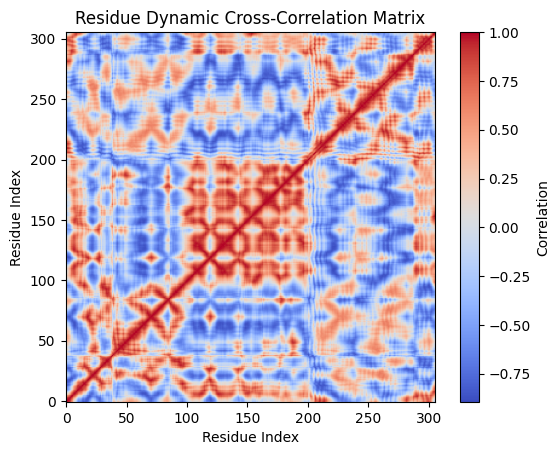

In [84]:
# select only the rows and columns of the covariance matrix that correspond to the indices of the atoms

#normalsise the covariance matrix
# cov = cov/np.max(cov)

print(corr.shape)
import matplotlib.pyplot as plt

# Plot residue correlation matrix as a heatmap
plt.imshow(corr, cmap='coolwarm', origin='lower')
plt.colorbar(label='Correlation')
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.title('Residue Dynamic Cross-Correlation Matrix')
plt.show()

(306, 306)


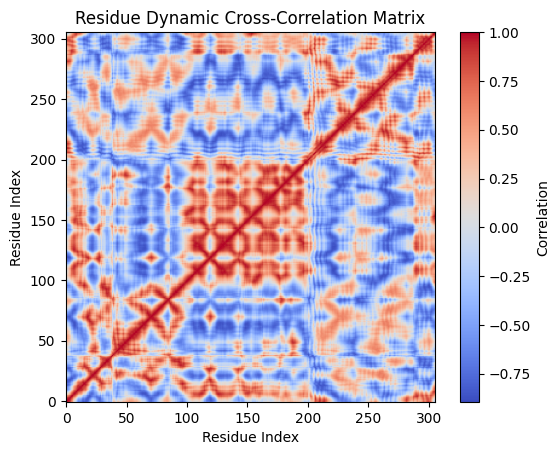

In [85]:
# select only the rows and columns of the covariance matrix that correspond to the indices of the atoms

#normalsise the covariance matrix
# cov = cov/np.max(cov)

print(corr.shape)
import matplotlib.pyplot as plt

# Plot residue correlation matrix as a heatmap
plt.imshow(corr, cmap='coolwarm', origin='lower')
plt.colorbar(label='Correlation')
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.title('Residue Dynamic Cross-Correlation Matrix')
plt.show()

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

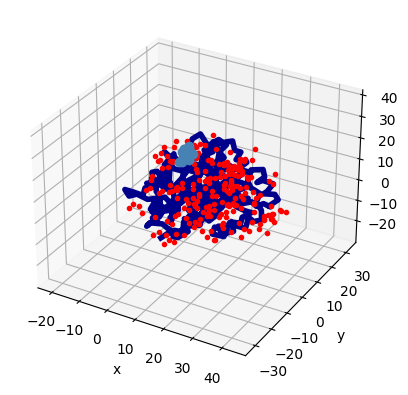

In [69]:
prody.showProtein(structure,style={'cartoon':{'colorscheme':'chain'},'stick':{'colorscheme':'chain'}})

In [70]:

import py3Dmol
prody.showProtein(structure,vecs=anm[0].getArray(),
                  flucts=prody.calcSqFlucts(anm[0]),
                  style={'cartoon':{}})



NameError: name 'anm' is not defined

In [71]:
prody.showProtein(structure,flucts=prody.calcSqFlucts(anm))

NameError: name 'anm' is not defined

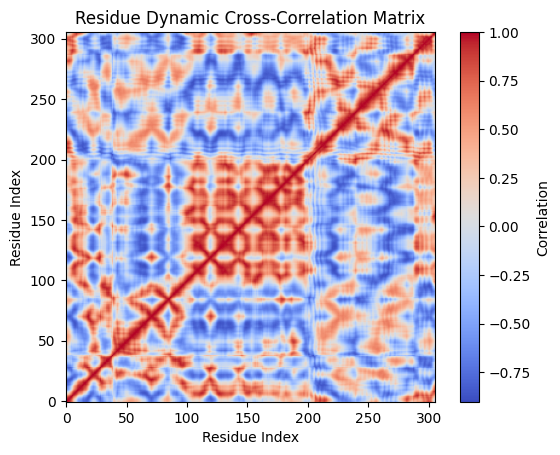

In [28]:
dynamic_cross_correlation = normalized_cov_matrix / np.sqrt(np.diag(normalized_cov_matrix)[:, None] * np.diag(normalized_cov_matrix)[None, :])


In [30]:
print(dynamic_cross_correlation.shape)

(7806, 7806)


NameError: name 'nma' is not defined